In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

In [57]:
df = pd.read_csv('/content/1000_Companies.csv')

In [58]:
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [60]:
df.shape

(1000, 5)

In [61]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [62]:
df.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


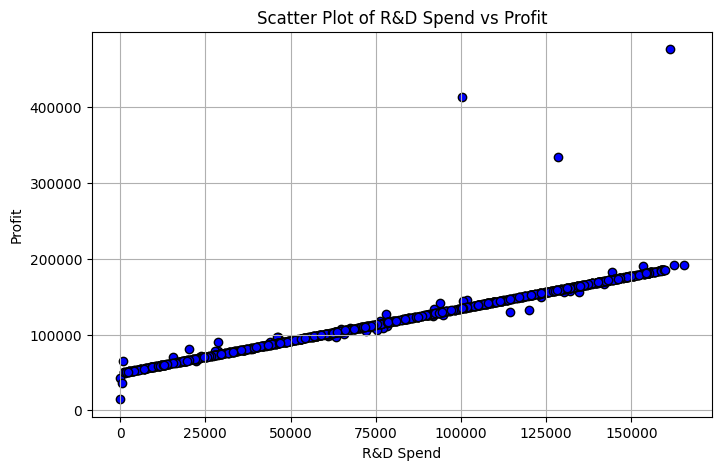

In [63]:
plt.figure(figsize=(8,5))
plt.scatter(df["R&D Spend"], df["Profit"], color='b', edgecolors='k')
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.title("Scatter Plot of R&D Spend vs Profit")
plt.grid(True)
plt.show()

In [64]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [65]:
X[:5] , y[:5]

(array([[165349.2, 136897.8, 471784.1, 'New York'],
        [162597.7, 151377.59, 443898.53, 'California'],
        [153441.51, 101145.55, 407934.54, 'Florida'],
        [144372.41, 118671.85, 383199.62, 'New York'],
        [142107.34, 91391.77, 366168.42, 'Florida']], dtype=object),
 array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94]))

In [66]:
le = LabelEncoder()
X[:,-1] = le.fit_transform(X[:,-1])

In [67]:
X[7]

array([130298.13, 145530.06, 323876.68, 1], dtype=object)

In [68]:
X_train , X_test ,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [69]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((800, 4), (800,), (200, 4), (200,))

In [70]:
clf  = LinearRegression()
clf.fit(X_train,y_train)

LinearRegression()

In [71]:
y_pred = clf.predict(X_test)

In [72]:
r2_score(y_test,y_pred)

0.98282072606409

In [73]:
print(clf.intercept_)

-82639.33335327635


In [74]:
print(clf.coef_)

[  0.53475259   1.13905087   0.08209917 -42.87167898]


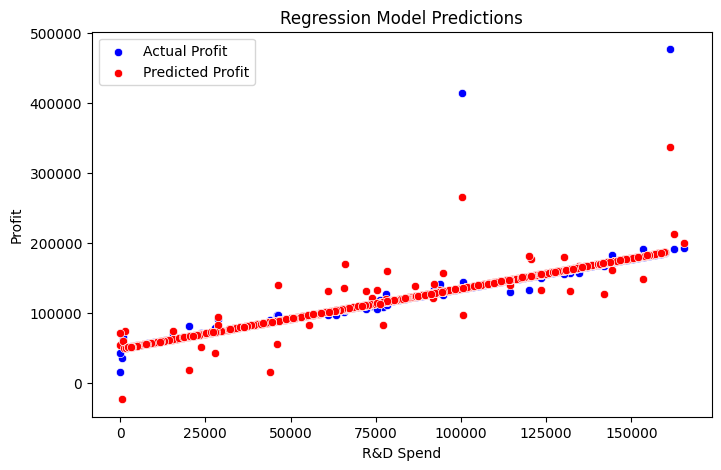

In [81]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_train[:, 0], y=y_train, color="blue", label="Actual Profit")  # R&D Spend vs. Profit
sns.scatterplot(x=X_train[:, 0], y=clf.predict(X_train), color="red", label="Predicted Profit")  # Model Predictions
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.title("Regression Model Predictions")
plt.legend()
plt.show()